# 🔍 SpoilScan - Harici Görsel ile Test
Bu notebook, eğitilen CNN modelinin dışarıdan bir görsel ile test edilmesini sağlar.

In [1]:
# ✅ Modeli Yükle
from tensorflow.keras.models import load_model

# Kendi model dosyanın adını buraya yaz
model = load_model("saved_models/train_test_normalized.h5")  # veya .keras

In [2]:
# 🖼️ Görseli Yükle ve Hazırla
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

IMG_HEIGHT, IMG_WIDTH = 224, 224  # Eğitimde kullanılan boyutlar

def load_and_preprocess_image(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)
    return image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Tahmin: Fresh (confidence: 0.50)


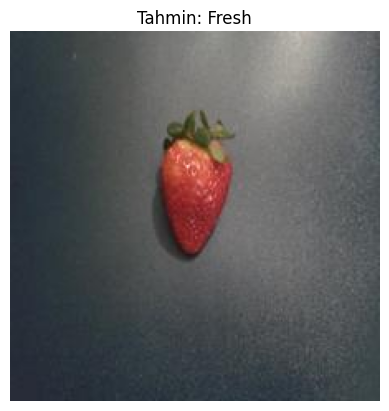

In [3]:
# 🔍 Tahmin Et ve Sonucu Görselleştir
image_path = "C:/Users/doruk/Documents/YAP_470_Project_SpoilScan/dataset_full/dataset_fresh_rotten/Rotten/1.jpg"  # Buraya test etmek istediğin görselin yolunu yaz
image = load_and_preprocess_image(image_path)

prediction = model.predict(image)[0][0]  # Sigmoid çıktısı

if prediction >= 0.5:
    label = "Rotten"
else:
    label = "Fresh"

print(f"Tahmin: {label} (confidence: {prediction:.2f})")

# Görseli Göster
plt.imshow(tf.keras.utils.load_img(image_path))
plt.title(f"Tahmin: {label}")
plt.axis('off')
plt.show()